# Ecological models: relevant?
## NIOZ Master Thesis Project
##### Author: R. Draaijer

In [1]:
import os

# Create universally (i.e. across various operating systems) recognized paths

notebook_path = os.path.abspath('MSc Thesis 1.ipynb')                  # Jupyter notebook path
TCDF_path = os.path.join(os.path.dirname(notebook_path), 'TCDF')       # TCDF folder path
TCDFdata_path = os.path.join(TCDF_path, 'data')                        # TCDF/data folder path
EBT_path = os.path.join(os.path.dirname(notebook_path), 'EBT Data')    # EBT folder path
DefaultCod_path = os.path.join(EBT_path, 'Modified Default Cod')       # EBT/Modified Default Cod folder path
Cod_path = os.path.join(DefaultCod_path, 'Modified Default.out')       # EBT/Modified Default Cod/Modified Default.out file path

### Import EBT Tool Data with NumPy
Two different datasets can be distinguished: Default Cod and Cannibalistic Cod. See paper (2008) and EBT Tutorial (2020) by Anieke van Leeuwen et al.

*Note that objects with uppercase namespaces are solely used for raw data files

In [2]:
# Get path for EBT data (.txt file)
path = Cod_path

# Check first entries of data
with open(path) as Default_Cod:
    print(Default_Cod.readline())

0.00	0.000000E+00	54.8212970000	0.2682070000	0.9892870000	8.5112130000	9.9553140000	50.0338940000	8.1868890000	0.8092280000	0.8422930000	0.000000E+00	0.000000E+00	0.000000E+00	0.000000E+00	0.000000E+00	56.6028346684	22.6730919259	25.9887468408	0.8307394959	0.1492078213	0.3078741160	9.8384100000	0.000000E+00



In [3]:
# Convert dataset to ndarray
import numpy as np

with open(path) as Default_Cod:
    default_cod = np.loadtxt(Default_Cod)

# Check (dimensions of) array
print(default_cod) 
print(default_cod.shape)           # Must be identical to ('Maximum integration time' + 1, OUTPUT_VAR_NR + 1) in EBT tool
print(default_cod.dtype)           # Should be float64

[[0.00000000e+00 0.00000000e+00 5.48212970e+01 ... 3.07874116e-01
  9.83841000e+00 0.00000000e+00]
 [1.00000000e+00 2.73972600e-03 5.48213227e+01 ... 3.07874682e-01
  9.83841208e+00 0.00000000e+00]
 [2.00000000e+00 5.47945210e-03 5.48213485e+01 ... 3.07875243e-01
  9.83841413e+00 0.00000000e+00]
 ...
 [3.64980000e+04 9.99945205e+01 6.25598481e+00 ... 2.24811300e-08
  6.26818600e-07 0.00000000e+00]
 [3.64990000e+04 9.99972603e+01 6.25598481e+00 ... 2.24691700e-08
  6.26477700e-07 0.00000000e+00]
 [3.65000000e+04 1.00000000e+02 6.25598481e+00 ... 2.24572100e-08
  6.26137000e-07 0.00000000e+00]]
(36501, 24)
float64


In hindsight the library pandas can be highly useful for loading data, therefore:

### Import EBT Tool Data with pandas
Two different datasets can be distinguished: Default Cod and Cannibalistic Cod. See paper (2008) and EBT Tutorial (2020) by Anieke van Leeuwen et al.

*Note that objects with uppercase namespaces are solely used for raw data files*

In [4]:
import pandas as pd

# Get path for EBT data (.txt file)
path = Cod_path

# Define column names (see EBT .c file in output variables section) for multilevel indexing
variables = ['Time', 'Years', 'RS', 'RJ', 'RA', 'SJ', 'SA', 'SB', 'CJ', 'CA', 'CB', 'Fc', 'ΔCJ with Fc', 'ΔCS with Fc',
             'ΔCA with Fc', 'ΔC with Fc', 'ΔSB', 'ΔSJ', 'ΔSA', 'ΔCB', 'ΔCJ', 'ΔCA', 'ΣC', 'Fs']
units = ['[day]', '[year]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]',
         '[g V-1]', '[-]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]',
         '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1]', '[-]']

with open(path) as Default_Cod:
    default_cod = pd.read_csv(Default_Cod, delimiter = '\t', header=None)

# Set column names and index
#columns = pd.MultiIndex.set_codes([[variables, units]], names = ['Output variable', 'Unit'])
default_cod.columns = variables
#default_cod.columns = columns
default_cod = default_cod.set_index('Time')

# Check (dimensions of) array
print(default_cod.shape)           # Must be identical to ('Maximum integration time' + 1, OUTPUT_VAR_NR + 1) in EBT tool

default_cod.head()

(36501, 23)


,Years,RS,RJ,RA,SJ,SA,SB,CJ,CA,CB,...,ΔCA with Fc,ΔC with Fc,ΔSB,ΔSJ,ΔSA,ΔCB,ΔCJ,ΔCA,ΣC,Fs
Time,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,54.821297,0.268207,0.989287,8.511213,9.955314,50.033894,8.186889,0.809228,0.842293,...,0.0,0.0,56.602835,22.673092,25.988747,0.830739,0.149208,0.307874,9.838410,0.0
1.0,0.002740,54.821323,0.268207,0.989287,8.511207,9.955310,50.033881,8.186888,0.809230,0.842294,...,0.0,0.0,56.602823,22.673058,25.988736,0.830741,0.149204,0.307875,9.838412,0.0
2.0,0.005479,54.821349,0.268207,0.989287,8.511201,9.955306,50.033867,8.186887,0.809231,0.842295,...,0.0,0.0,56.602811,22.673023,25.988726,0.830742,0.149200,0.307875,9.838414,0.0
3.0,0.008219,54.821374,0.268207,0.989287,8.511194,9.955302,50.033854,8.186887,0.809233,0.842297,...,0.0,0.0,56.602799,22.672989,25.988715,0.830743,0.149195,0.307876,9.838416,0.0
4.0,0.010959,54.821401,0.268207,0.989287,8.511188,9.955297,50.033840,8.186886,0.809235,0.842298,...,0.0,0.0,56.602787,22.672955,25.988704,0.830744,0.149191,0.307876,9.838418,0.0


Text(0.5, 0, 'Time [year]')

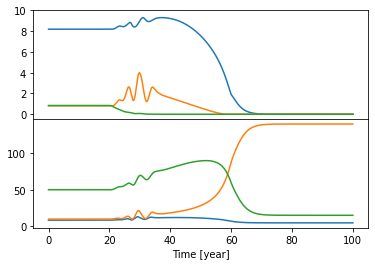

In [5]:
# Visualize default_cod as is visualized by the EBT tool
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Make figure to visualize plots in
fig, axes = plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(hspace=0)

# Select the biomass columns
# Cod biomass
cod_fig = fig.add_subplot(axes[0])
cod_fig.plot(default_cod['Years'], default_cod[['CJ','CA','CB']])

cod_fig.set_xticks(np.arange(0,110,20))
cod_fig.set_yticks(np.arange(0,12,2))


# Sprat biomass
sprat_fig = fig.add_subplot(axes[1])
sprat_fig.plot(default_cod['Years'], default_cod[['SJ','SA','SB']])

cod_fig.set_xticks(np.arange(0,110,20))
cod_fig.set_yticks(np.arange(0,12,2))
sprat_fig.set_xlabel('Time [year]')

## TCDF Demo with Demo Data from EBT Tool

#### Author: R. Draaijer


In [6]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

# Load data from EBT tool into DataFrame
path = Cod_path
ebt = pd.read_csv(path, delimiter = '\t', header = None)

# Show first 10 rows of dataset
ebt.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.000000,54.821297,0.268207,0.989287,8.511213,9.955314,50.033894,8.186889,0.809228,...,0.0,0.0,56.602835,22.673092,25.988747,0.830739,0.149208,0.307874,9.838410,0.0
1,1.0,0.002740,54.821323,0.268207,0.989287,8.511207,9.955310,50.033881,8.186888,0.809230,...,0.0,0.0,56.602823,22.673058,25.988736,0.830741,0.149204,0.307875,9.838412,0.0
2,2.0,0.005479,54.821349,0.268207,0.989287,8.511201,9.955306,50.033867,8.186887,0.809231,...,0.0,0.0,56.602811,22.673023,25.988726,0.830742,0.149200,0.307875,9.838414,0.0
3,3.0,0.008219,54.821374,0.268207,0.989287,8.511194,9.955302,50.033854,8.186887,0.809233,...,0.0,0.0,56.602799,22.672989,25.988715,0.830743,0.149195,0.307876,9.838416,0.0
4,4.0,0.010959,54.821401,0.268207,0.989287,8.511188,9.955297,50.033840,8.186886,0.809235,...,0.0,0.0,56.602787,22.672955,25.988704,0.830744,0.149191,0.307876,9.838418,0.0
5,5.0,0.013699,54.821427,0.268207,0.989287,8.511182,9.955293,50.033827,8.186885,0.809236,...,0.0,0.0,56.602775,22.672921,25.988692,0.830745,0.149187,0.307877,9.838420,0.0
6,6.0,0.016438,54.821453,0.268207,0.989287,8.511175,9.955289,50.033813,8.186884,0.809238,...,0.0,0.0,56.602763,22.672887,25.988681,0.830747,0.149183,0.307877,9.838422,0.0
7,7.0,0.019178,54.821479,0.268207,0.989287,8.511169,9.955284,50.033799,8.186883,0.809240,...,0.0,0.0,56.602751,22.672853,25.988669,0.830748,0.149179,0.307878,9.838424,0.0
8,8.0,0.021918,54.821506,0.268206,0.989287,8.511163,9.955279,50.033786,8.186882,0.809241,...,0.0,0.0,56.602739,22.672819,25.988657,0.830749,0.149175,0.307879,9.838426,0.0
9,9.0,0.024658,54.821533,0.268206,0.989287,8.511157,9.955275,50.033772,8.186881,0.809243,...,0.0,0.0,56.602727,22.672785,25.988645,0.830750,0.149171,0.307879,9.838428,0.0


In [7]:
# Rename columns (see file /Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding/Explanation Output Parameters.docx)
labels = ['Time (day)', 'Time (year)',                    # Time labels
          'Rs', 'Rj', 'Ra',                               # Shared resources biomass
          'Sj', 'Sa', 'Sb',                               # Sprat stages biomass
          'Cj', 'Ca', 'Cb',                               # Cod stages biomass
          'Fc',                                           # Fishing imposed on cod
          'ΔCj + Fc', 'ΔCa + Fc', 'ΔCb + Fc', 'ΔC + Fc', # Changes in cod biomass when fishing present
          'ΔSb', 'ΔSj', 'ΔSa',                           # Changes in sprat biomass
          'ΔCb', 'ΔCj', 'ΔCa',                           # Changes in cod biomass
          'ΣC',                                           # Sum of cod biomass
          'Fs']                                           # Fishing imposed on sprat
ebt.columns = labels

# Show new column labels
print(ebt.columns)

Index(['Time (day)', 'Time (year)', 'Rs', 'Rj', 'Ra', 'Sj', 'Sa', 'Sb', 'Cj',
       'Ca', 'Cb', 'Fc', 'ΔCj + Fc', 'ΔCa + Fc', 'ΔCb + Fc', 'ΔC + Fc', 'ΔSb',
       'ΔSj', 'ΔSa', 'ΔCb', 'ΔCj', 'ΔCa', 'ΣC', 'Fs'],
      dtype='object')


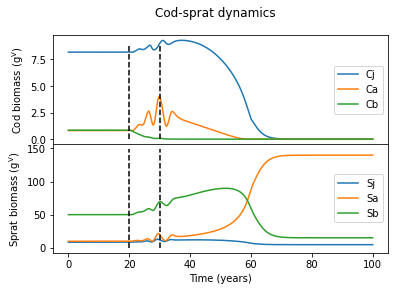

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Select data to be visualized
cod = ebt[['Cj', 'Ca', 'Cb']]
sprat = ebt[['Sj', 'Sa', 'Sb']]
time = ebt['Time (year)']

# Set subplot figure defaults
fig, [cod_plt, sprat_plt] = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace = 0)
fig.suptitle('Cod-sprat dynamics')

# Set labels for shared x-axis and individual y-axes
cod_plt.set(ylabel = 'Cod biomass ($\mathregular{g^V}$)')
sprat_plt.set(ylabel = 'Sprat biomass ($\mathregular{g^V}$)')
plt.xlabel('Time (years)')

# Visualize data
cod_plt.plot(time, cod)
sprat_plt.plot(time, sprat)

# Add legends
cod_plt.legend(['Cj', 'Ca', 'Cb'], loc = 'center right')
sprat_plt.legend(['Sj', 'Sa', 'Sb'], loc = 'center right')

# Draw vertical line at 20 years and 30 years to visualize data selection
cod_plt.plot([20] * 10, np.arange(0,10), '--k')
sprat_plt.plot([20] * 150, np.arange(0,150), '--k')

cod_plt.plot([30] * 10, np.arange(0,10), '--k')
sprat_plt.plot([30] * 150, np.arange(0,150), '--k')

In the above figure dashed lines represent the data I have selected to carry out a demo of the TCDF machine learning model. For the purpose of this demo I have aditionally selected a low resolution of 30 day timesteps over 100 years. Next I will clean the data for this demo purpose too, with the following characteristics:
> - Data between year 20 and 30 (i.e. 120 datapoints) 
> - Inclusion of the columns representing sprat- and cod stages
> - Inclusion of the shared resources columns

The data needs to be converted into a .csv file with every column representative of a (continuous) timeseries and the header needs explanatory column names (for eventually we will create a temporal causal graph with each node representing a timeseries).

In [9]:
# Select information of datapoints between year 20 and 30
demo_ebt = ebt[(ebt['Time (year)'] >= 20) & (ebt['Time (year)'] <= 30)]

# Select only the necessary biomass columns as timeseries
demo_ebt = demo_ebt[['Rs', 'Rj', 'Ra',
                     'Sj', 'Sa', 'Sb',
                     'Cj', 'Ca', 'Cb',
                     'Fc']]

# Reset index
demo_ebt.reset_index(inplace = True)
demo_ebt.drop('index', axis = 'columns', inplace = True)

# Show first and last five columns of clean dataframe
demo_ebt.head(-5)

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184919,0.809400,0.843533,0.000000
1,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184919,0.809399,0.843532,0.001027
2,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184919,0.809399,0.843530,0.002055
3,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184918,0.809398,0.843527,0.003082
4,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184917,0.809396,0.843522,0.004110
...,...,...,...,...,...,...,...,...,...,...
3641,25.940005,0.290546,0.969713,11.992235,20.165629,69.478724,8.987906,3.973822,0.076795,3.740753
3642,25.957505,0.290461,0.969712,11.986605,20.150119,69.483323,8.989210,3.972971,0.076769,3.741781
3643,25.975086,0.290377,0.969711,11.980978,20.134557,69.487854,8.990512,3.972101,0.076743,3.742808
3644,25.992747,0.290292,0.969711,11.975354,20.118942,69.492318,8.991813,3.971212,0.076716,3.743836


## Low Resolution Dataset
Run these cells when performing machine learning model with low res dataset

In [10]:
# Compress dataset to lower resolution (~365 datapoints)
low_demo_ebt = demo_ebt.iloc[::10, :]
low_demo_ebt.reset_index(drop = True, inplace = True)
low_demo_ebt['Time'] = np.linspace(20, 30, 366)

# Check format of low resolution dataset
low_demo_ebt

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc,Time
0,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184919,0.809400,0.843533,0.000000,20.000000
1,54.838330,0.268238,0.989280,8.510207,9.956563,50.013248,8.184903,0.809379,0.843464,0.010274,20.027397
2,54.838303,0.268239,0.989280,8.510224,9.956576,50.013281,8.184851,0.809317,0.843258,0.020548,20.054795
3,54.838202,0.268241,0.989282,8.510272,9.956614,50.013370,8.184762,0.809213,0.842916,0.030822,20.082192
4,54.837966,0.268244,0.989284,8.510369,9.956694,50.013544,8.184634,0.809070,0.842440,0.041096,20.109589
...,...,...,...,...,...,...,...,...,...,...,...
361,25.440350,0.293186,0.969794,12.167928,20.617554,69.302405,8.946928,3.990450,0.077369,3.708904,29.890411
362,25.592090,0.292331,0.969755,12.111058,20.478283,69.366466,8.960258,3.987189,0.077231,3.719178,29.917808
363,25.753000,0.291479,0.969728,12.054347,20.332621,69.423668,8.973486,3.981907,0.077048,3.729452,29.945205
364,25.922587,0.290631,0.969713,11.997868,20.181086,69.474057,8.986601,3.974654,0.076820,3.739726,29.972603


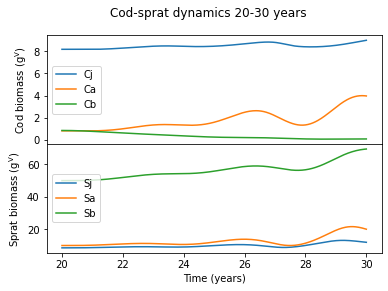

In [11]:
# Visualize data from lower resolution dataset 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Select data to be visualized
cod = low_demo_ebt[['Cj', 'Ca', 'Cb']]
sprat = low_demo_ebt[['Sj', 'Sa', 'Sb']]
time = low_demo_ebt['Time']

# Set subplot figure defaults
fig, [cod_plt, sprat_plt] = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace = 0)
fig.suptitle('Cod-sprat dynamics 20-30 years')

# Set labels for shared x-axis and individual y-axes
cod_plt.set(ylabel = 'Cod biomass ($\mathregular{g^V}$)')
sprat_plt.set(ylabel = 'Sprat biomass ($\mathregular{g^V}$)')
plt.xlabel('Time (years)')

# Visualize data
cod_plt.plot(time, cod)
sprat_plt.plot(time, sprat)

# Add legends
cod_plt.legend(['Cj', 'Ca', 'Cb'], loc = 'center left')
sprat_plt.legend(['Sj', 'Sa', 'Sb'], loc = 'center left')

# Remove Time column
low_demo_ebt.drop(['Time'], axis = 1, inplace = True)

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data with min-max normalization
scaler = MinMaxScaler()
ebt_scaled = scaler.fit_transform(low_demo_ebt)

# Write scaled data to DataFrame
labels = ['Rs', 'Rj', 'Ra',
          'Sj', 'Sa', 'Sb',
          'Cj', 'Ca', 'Cb',
          'Fc']
demo_ebt_scaled = pd.DataFrame(ebt_scaled, columns = labels)

# Check the scaled DataFrame
demo_ebt_scaled.head(-10)

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,1.000000,0.165405,0.984417,0.000000e+00,0.000123,0.000000e+00,0.011209,0.002429,1.000000,0.000000
1,1.000000,0.165409,0.984422,5.055820e-07,0.000123,2.369050e-07,0.011189,0.002423,0.999912,0.002740
2,0.999999,0.165428,0.984450,4.195656e-06,0.000124,1.907222e-06,0.011126,0.002403,0.999650,0.005479
3,0.999996,0.165470,0.984512,1.458505e-05,0.000128,6.462716e-06,0.011018,0.002371,0.999214,0.008219
4,0.999988,0.165540,0.984610,3.547577e-05,0.000135,1.537952e-05,0.010862,0.002326,0.998606,0.010959
...,...,...,...,...,...,...,...,...,...,...
351,0.000394,0.834836,0.058395,9.102274e-01,0.994137,9.365301e-01,0.771108,0.972165,0.021485,0.961644
352,0.001315,0.818991,0.050148,8.991905e-01,0.990120,9.433765e-01,0.787616,0.978138,0.021878,0.964384
353,0.002741,0.802812,0.042518,8.878420e-01,0.985123,9.498690e-01,0.804167,0.983378,0.022219,0.967123
354,0.004649,0.786351,0.035513,8.762325e-01,0.979184,9.560058e-01,0.820744,0.987887,0.022505,0.969863


## High Resolution Dataset
Run these cells when performing machine learning model with high res dataset

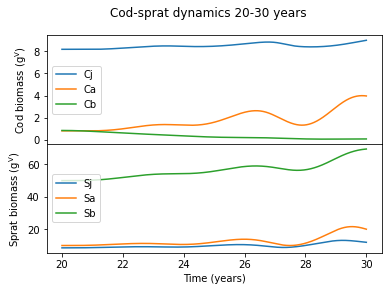

In [13]:
# Visualize data from lower resolution dataset 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Select data to be visualized
cod = demo_ebt[['Cj', 'Ca', 'Cb']]
sprat = demo_ebt[['Sj', 'Sa', 'Sb']]
demo_ebt['Time'] = np.linspace(20, 30, 3651)
time = demo_ebt['Time']

# Set subplot figure defaults
fig, [cod_plt, sprat_plt] = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace = 0)
fig.suptitle('Cod-sprat dynamics 20-30 years')

# Set labels for shared x-axis and individual y-axes
cod_plt.set(ylabel = 'Cod biomass ($\mathregular{g^V}$)')
sprat_plt.set(ylabel = 'Sprat biomass ($\mathregular{g^V}$)')
plt.xlabel('Time (years)')

# Visualize data
cod_plt.plot(time, cod)
sprat_plt.plot(time, sprat)

# Add legends
cod_plt.legend(['Cj', 'Ca', 'Cb'], loc = 'center left')
sprat_plt.legend(['Sj', 'Sa', 'Sb'], loc = 'center left')

# Remove Time column
demo_ebt.drop(['Time'], axis = 1, inplace = True)

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data with min-max normalization
scaler = MinMaxScaler()
ebt_scaled = scaler.fit_transform(demo_ebt)

# Write scaled data to DataFrame
labels = ['Rs', 'Rj', 'Ra',
          'Sj', 'Sa', 'Sb',
          'Cj', 'Ca', 'Cb',
          'Fc']
demo_ebt_scaled = pd.DataFrame(ebt_scaled, columns = labels)

# Check the scaled DataFrame
demo_ebt_scaled.head(-10)

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,1.000000,0.165474,0.984412,0.000000e+00,0.000190,0.000000e+00,0.011218,0.002431,1.000000,0.000000
1,1.000000,0.165474,0.984412,3.460765e-10,0.000190,1.384297e-10,0.011218,0.002431,0.999999,0.000274
2,1.000000,0.165474,0.984412,3.655433e-09,0.000190,1.697049e-09,0.011217,0.002431,0.999996,0.000548
3,1.000000,0.165474,0.984412,1.286972e-08,0.000190,6.111427e-09,0.011216,0.002430,0.999992,0.000822
4,1.000000,0.165474,0.984413,3.110363e-08,0.000190,1.480175e-08,0.011215,0.002430,0.999986,0.001096
...,...,...,...,...,...,...,...,...,...,...
3636,0.043359,0.622474,0.000372,7.592537e-01,0.882482,9.967713e-01,0.977885,0.995656,0.022334,0.996164
3637,0.043923,0.620770,0.000308,7.580328e-01,0.881175,9.970244e-01,0.979474,0.995420,0.022304,0.996438
3638,0.044489,0.619066,0.000250,7.568126e-01,0.879863,9.972741e-01,0.981062,0.995177,0.022273,0.996712
3639,0.045059,0.617363,0.000198,7.555930e-01,0.878546,9.975202e-01,0.982649,0.994929,0.022242,0.996986


## Run this after selection of dataset resolution

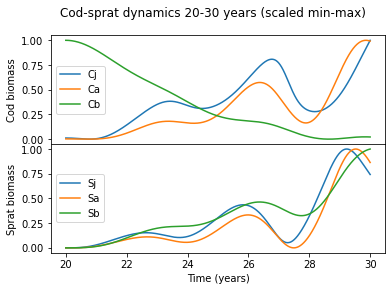

In [15]:
# Visualize scaled data 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Select data to be visualized
cod = demo_ebt_scaled[['Cj', 'Ca', 'Cb']]
sprat = demo_ebt_scaled[['Sj', 'Sa', 'Sb']]
demo_ebt_scaled['Time'] = np.linspace(20, 30, len(demo_ebt_scaled))
time = demo_ebt_scaled['Time']

# Set subplot figure defaults
fig, [cod_plt, sprat_plt] = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace = 0)
fig.suptitle('Cod-sprat dynamics 20-30 years (scaled min-max)')

# Set labels for shared x-axis and individual y-axes
cod_plt.set(ylabel = 'Cod biomass')
sprat_plt.set(ylabel = 'Sprat biomass')
plt.xlabel('Time (years)')

# Visualize data
cod_plt.plot(time, cod)
sprat_plt.plot(time, sprat)

# Add legends
cod_plt.legend(['Cj', 'Ca', 'Cb'], loc = 'center left')
sprat_plt.legend(['Sj', 'Sa', 'Sb'], loc = 'center left')

# Remove Time column
demo_ebt_scaled.drop(['Time'], axis = 1, inplace = True)

In [16]:
# Create file path for new file
DemoEBTScaled_path = os.path.join(TCDFdata_path, 'EBT_demo_dataset.csv')

# Write clean dataframe demo_ebt to a new .csv file
demo_ebt_scaled.to_csv(DemoEBTScaled_path, index = False)

For implementation of the first machine model (i.e. TCDF) we have to create a reference to the 'groundtruth' of the model. This makes it possible to compare the found relations by the model to the true relations we have defined in the dataset.

The groundtruth file needs to be .csv file, have no heading and contains three columns. The first column consists of the index of the cause (corresponds to the columnnumber in the EBT_demo_dataset.csv file), index of effect (idem dito), and time delay between index and cause.

For the corresponding causes and effects see the paper by A. van Leeuwen et al. (2008).

In [17]:
# Create list of lists for the rows to the groundtruth.csv file
groundtruth_rows = [[9, 7, 0],  # Fc - Ca
                    [9, 8, 0],  # Fc - Cb
                    [6, 1, 0],  # Cj - Rj
                    [6, 3, 0],  # Cj - Sj
                    [7, 3, 0],  # Ca - Sj
                    [7, 4, 0],  # Ca - Sa
                    [7, 5, 0],  # Ca - Sb
                    [8, 3, 0],  # Cb - Sj
                    [8, 4, 0],  # Cb - Sa
                    [8, 5, 0],  # Cb - Sb
                    [8, 2, 0],  # Cb - Ra
                    [3, 0, 0],  # Sj - Rs
                    [4, 0, 0],  # Sa - Rs
                    [5, 0, 0]]  # Sb - Rs

# Convert list into DataFrame
groundtruth = pd.DataFrame(groundtruth_rows)

# Create file path for new file
DemoEBTGroundtruth_path = os.path.join(TCDFdata_path, 'EBT_demo_groundtruth.csv')

# Write DataFrame to .csv
groundtruth.to_csv(DemoEBTGroundtruth_path, index = False, header = False)


Performing the TCDF requires a different directory (where the TCDF is located). Check if the current directory is set at `'/.../TCDF'`.

In [18]:
# Define needed directory
directory = TCDF_path

# Check current working directory
current_directory = os.getcwd()

# Change working directory to perform TCDF
if current_directory != directory:
    os.chdir(TCDF_path)

# Check new current working directory
os.getcwd()

'C:\\Users\\10528504\\Documents\\GitHub\\thesis\\TCDF'

This part shows the functionality of TCDF.

See the corresponding paper for more detail: ["Causal Discovery with Attention-Based Convolutional Neural Networks"](https://www.mdpi.com/2504-4990/1/1/19).

In [19]:
# Install conda- and pip packages in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} git
!{sys.executable} -m pip install torchvision

Solving environment: ...working... done

# All requested packages already installed.



# Run TCDF

These next code cells perform the analysis of the demo dataset with the TCDF. In the utils.py file you are able to adjust parameters for adaptive learning rate and early stopping. These parameters include type of optimizer (specified in runTCDF.py arguments), number of epochs before adapting learning rate, minimum learning rate, and size of decreasing learning rate factor. For early stopping two parameters are given, the number of epochs before stopping when loss is not improving and the minimum difference in loss improvement.

In [20]:
# Show all argument options

%run -i "runTCDF.py" --help

usage: runTCDF.py [-h] [--cuda] [--epochs EPOCHS] [--kernel_size KERNEL_SIZE]
                  [--hidden_layers HIDDEN_LAYERS]
                  [--learning_rate LEARNING_RATE] [--optimizer {Adam,RMSprop}]
                  [--log_interval LOG_INTERVAL] [--seed SEED]
                  [--dilation_coefficient DILATION_COEFFICIENT]
                  [--significance SIGNIFICANCE] [--plot]
                  (--ground_truth GROUND_TRUTH | --data DATA [DATA ...])
                  [--lr_scheduler] [--early_stopping]

TCDF: Temporal Causal Discovery Framework

optional arguments:
  -h, --help            show this help message and exit
  --cuda                Use CUDA (GPU) (default: False)
  --epochs EPOCHS       Number of epochs (default: 1000)
  --kernel_size KERNEL_SIZE
                        Size of kernel, i.e. window size. Maximum delay to be
                        found is kernel size - 1. Recommended to be equal to
                        dilation coeffient (default: 4)
  --hidden_

<Figure size 432x288 with 0 Axes>

In [21]:
# This function is to be used to plot the model's loss after running 
def plot_losses(all_losses):
    """Plots the losses for each trained variable for the TCDF model"""
    # Preallocate plots in subplots
    fig, axs = plt.subplots(3, 3, sharex = True)
    for ax in axs.flat:
        ax.set(xlabel='Epochs', ylabel='Loss')

    # Plot every variable in different subplot
    axs[0, 0].plot(np.arange(len(all_losses[0])), all_losses[0])
    axs[0, 0].set_title('Losses Rs')
    axs[0, 1].plot(np.arange(len(all_losses[1])), all_losses[1])
    axs[0, 1].set_title('Losses Rj')
    axs[0, 2].plot(np.arange(len(all_losses[2])), all_losses[2])
    axs[0, 2].set_title('Losses Ra')
    axs[1, 0].plot(np.arange(len(all_losses[3])), all_losses[3])
    axs[1, 0].set_title('Losses Sj')
    axs[1, 1].plot(np.arange(len(all_losses[4])), all_losses[4])
    axs[1, 1].set_title('Losses Sa')
    axs[1, 2].plot(np.arange(len(all_losses[5])), all_losses[5])
    axs[1, 2].set_title('Losses Sb')
    axs[2, 0].plot(np.arange(len(all_losses[6])), all_losses[6])
    axs[2, 0].set_title('Losses Cj')
    axs[2, 1].plot(np.arange(len(all_losses[7])), all_losses[7])
    axs[2, 1].set_title('Losses Ca')
    axs[2, 2].plot(np.arange(len(all_losses[8])), all_losses[8])
    axs[2, 2].set_title('Losses Cb')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

# First Run

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_demo_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=5467, significance=0.95)

 Dataset:  EBT_demo_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.315483
Epoch    32: reducing learning rate of group 0 to 1.0000e-02.
Epoch: 100 [20%] 	Loss: 0.002285
INFO: Early stopping at epoch 100
Potential causes:  [4, 2]
Validated causes:  [4]

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.088744
Epoch    34: reducing learning rate of group 0 to 1.0000e-02.
Epoch    45: reducing learning rate of group 0 to 1.0000e-03.
Epoch    56: reducing learning rate of group 0 to 1.00

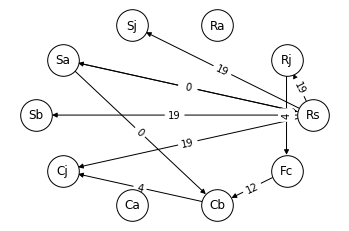

<Figure size 432x288 with 0 Axes>

In [22]:
%matplotlib inline

# Run TCDF with the selected demo dataset of EBT data

%run -i "runTCDF.py"  --ground_truth data/EBT_demo_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --log_interval 100 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 5467 --plot


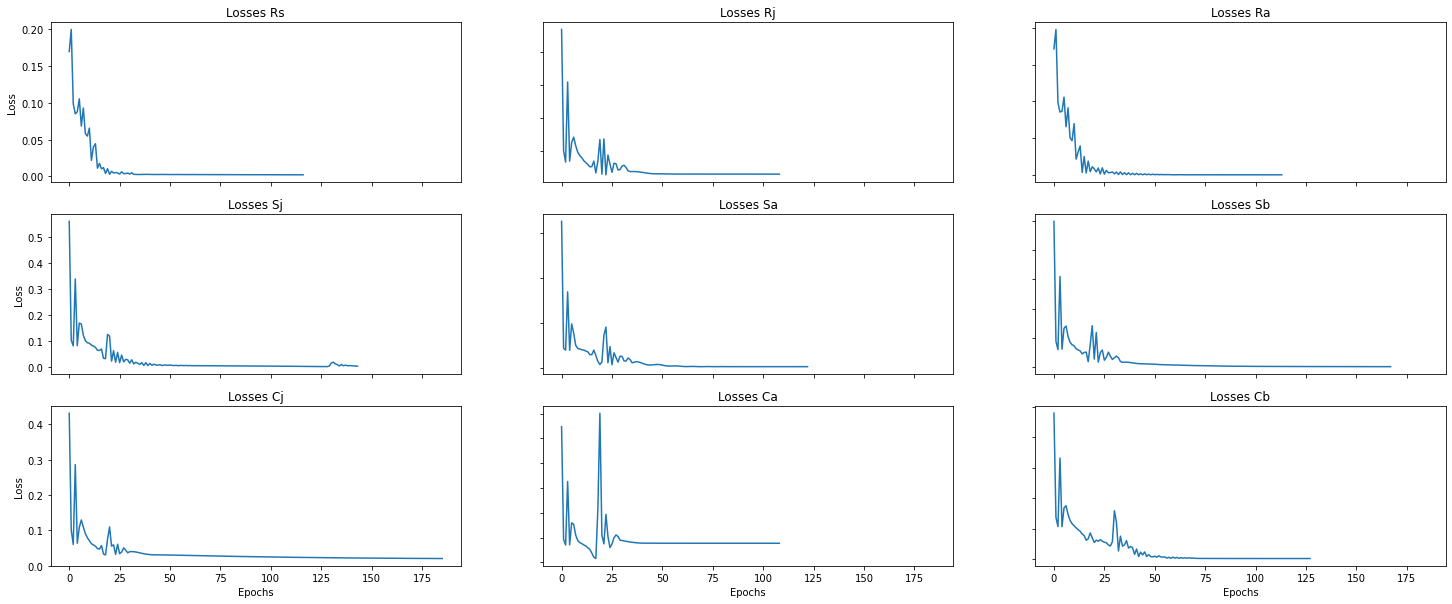

In [23]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot losses
plot_losses(alllosses)

# Second Run

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_demo_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=500, lr_scheduler=True, optimizer='Adam', plot=True, seed=1111, significance=0.95)

 Dataset:  EBT_demo_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.465394
Epoch    33: reducing learning rate of group 0 to 1.0000e-02.
Epoch    44: reducing learning rate of group 0 to 1.0000e-03.
Epoch    55: reducing learning rate of group 0 to 1.0000e-04.
Epoch    66: reducing learning rate of group 0 to 1.0000e-05.
Epoch    77: reducing learning rate of group 0 to 1.0000e-06.
INFO: Early stopping at epoch 100
Potential causes:  [7, 3, 2]
Validated causes:  [7]

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early 

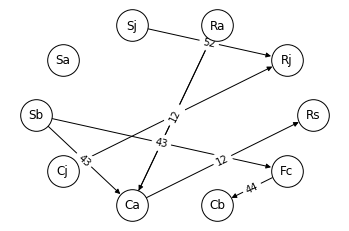

<Figure size 432x288 with 0 Axes>

In [24]:
%matplotlib inline

# Run TCDF and evaluate by comparing the results to the ground truth

%run -i "runTCDF.py"  --ground_truth data/EBT_demo_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 1111 --plot

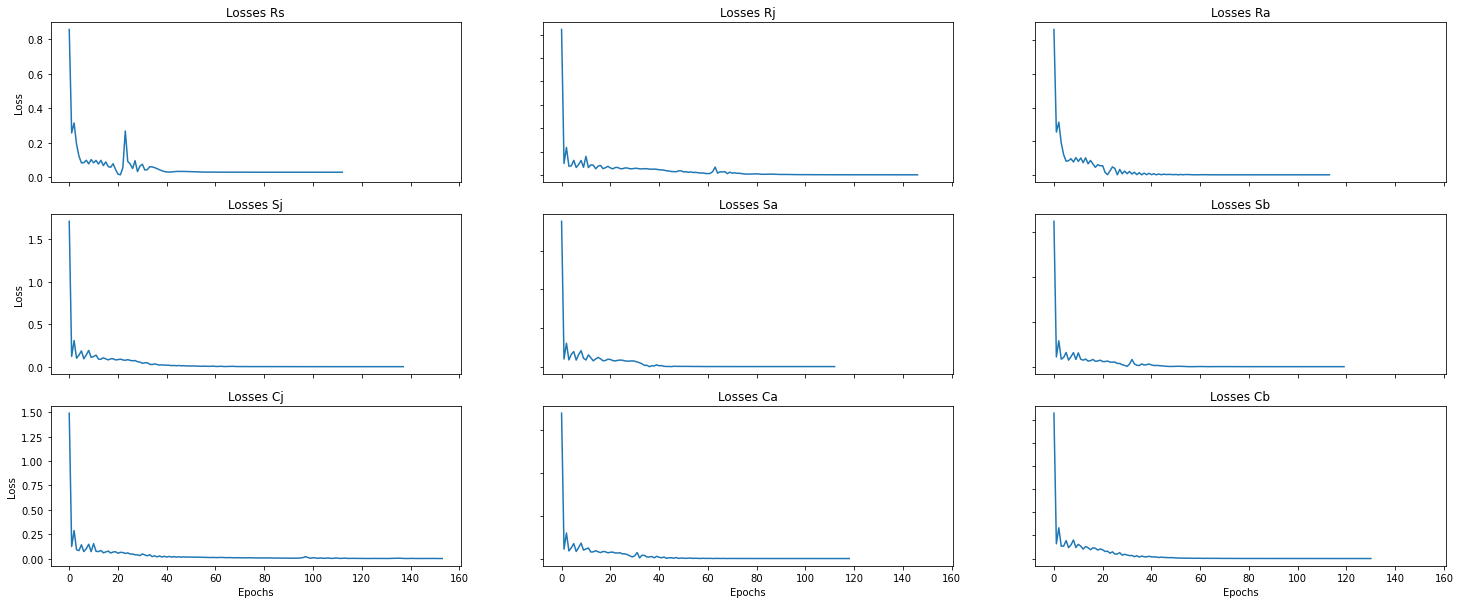

In [25]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot losses
plot_losses(alllosses)

# Third Run

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_demo_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=500, lr_scheduler=True, optimizer='Adam', plot=True, seed=25942, significance=0.95)

 Dataset:  EBT_demo_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.500106
INFO: Early stopping at epoch 100
Potential causes:  [3, 5]
Validated causes:  [3]

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.163839
Epoch    45: reducing learning rate of group 0 to 1.0000e-02.
Epoch    56: reducing learning rate of group 0 to 1.0000e-03.
Epoch    67: reducing learning rate of group 0 to 1.0000e-04.
Epoch    78: reducing learning rate of group 0 to 1.0000e-05.
Epoch    89: reducing le

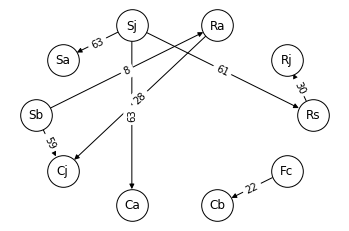

<Figure size 432x288 with 0 Axes>

In [26]:
%matplotlib inline

# Run TCDF and evaluate by comparing the results to the ground truth

%run -i "runTCDF.py"  --ground_truth data/EBT_demo_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 25942 --plot

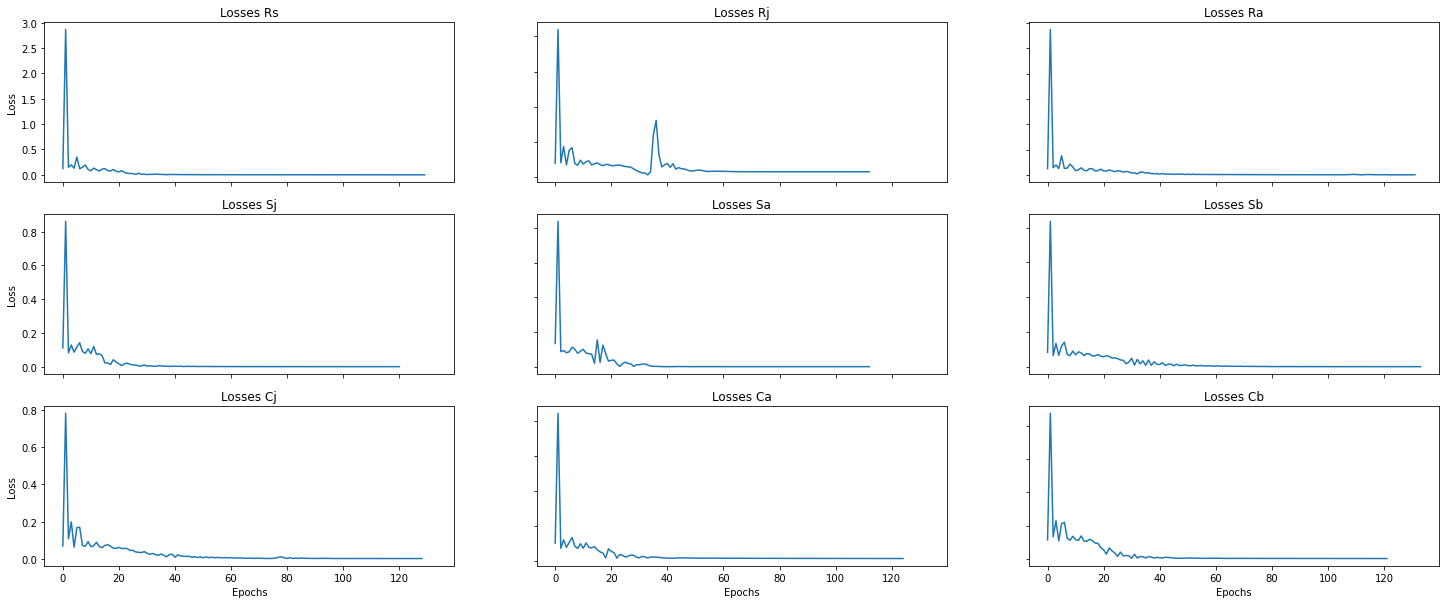

In [27]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot losses
plot_losses(alllosses)

### Predictive accuracy/Evaluation (i.e. test loss against groundtruth of ecological relations)

In [ ]:
%matplotlib inline

# Run TCDF and evaluate by comparing the results to the ground truth

%run -i "runTCDF.py"  --ground_truth data/EBT_demo_dataset.csv=data/EBT_demo_groundtruth.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --significance 0.95 --dilation_coefficient 4 --kernel_size 4 --seed 34

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, early_stopping=True, epochs=500, ground_truth={'data/EBT_demo_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=500, lr_scheduler=True, optimizer='Adam', plot=False, seed=34, significance=0.95)

 Dataset:  EBT_demo_dataset.csv

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.760046
INFO: Early stopping at epoch 100
Potential causes:  [9, 3, 1, 7, 4]
Validated causes:  []

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.304662
Epoch    22: reducing learning rate of group 0 to 1.0000e-02.
Epoch    70: reducing learning rate of group 0 to 1.0000e-03.
INFO: Early stopping at epoch 100
Potential causes:  [1, 3, 4, 7, 9]
Validated causes:  [1]

 Analysis started for target:  Ra
INFO: Initializ

In [ ]:
%matplotlib inline
# Set figure size 
plt.rcParams['figure.figsize'] = [25, 10]

# Plot losses
plot_losses(alllosses)

Arguments: Namespace(cuda=False, data=['data/EBT_demo_dataset.csv'], dilation_coefficient=4, early_stopping=True, epochs=500, hidden_layers=2, kernel_size=4, learning_rate=0.1, log_interval=100, lr_scheduler=True, optimizer='Adam', plot=True, seed=5467, train_test_split=0.8)

 Analysis started for target:  Rs
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.380277
Epoch: 100 [20%] 	Loss: 0.001620
Epoch   101: reducing learning rate of group 0 to 1.0000e-02.
Epoch   112: reducing learning rate of group 0 to 1.0000e-03.
INFO: Early stopping at epoch 100

 Analysis started for target:  Rj
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch:  1 [0%] 	Loss: 0.013292
Epoch    17: reducing learning rate of group 0 to 1.0000e-02.
Epoch: 100 [20%] 	Loss: 0.005694
Epoch   159: reducing learning rate of group 0 to 1.0000e-03.
INFO: Early stopping at epoch 100

 Analysis started for target:  Ra
INFO: Initializing le

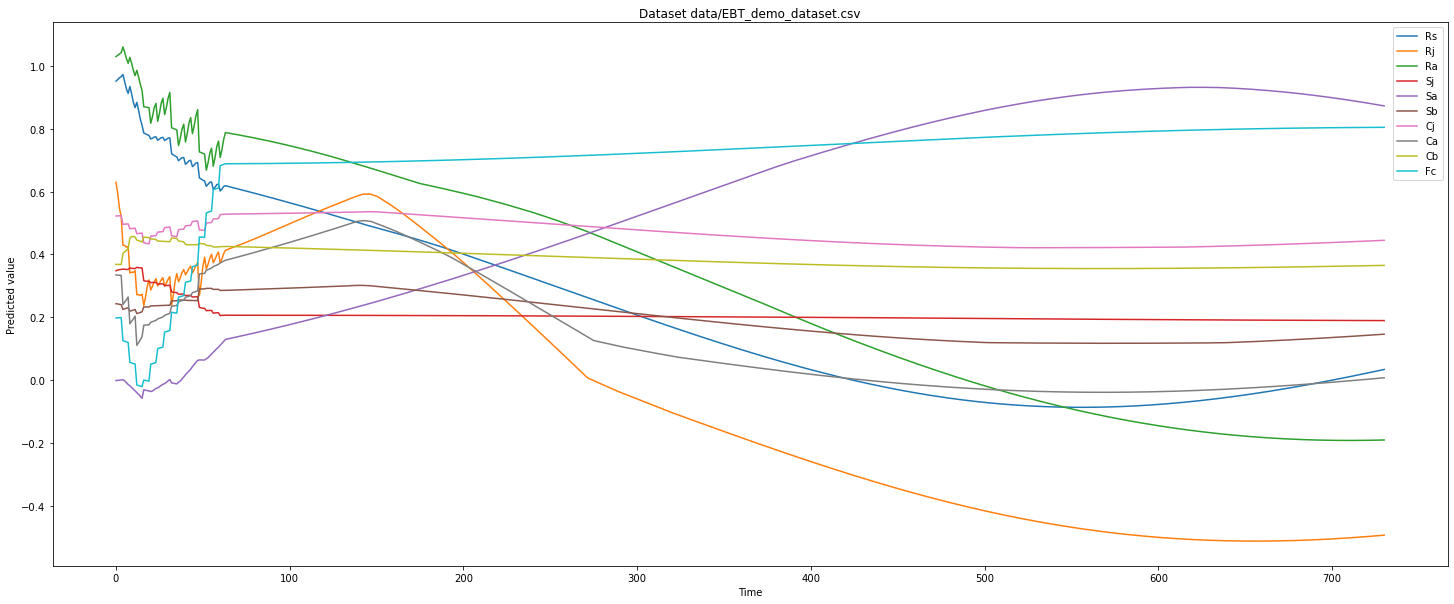

<Figure size 1800x720 with 0 Axes>

In [39]:
%run -i "evaluate_predictions_TCDF.py" --data data/EBT_demo_dataset.csv --learning_rate 0.1 --hidden_layers 2 --epochs 500 --log_interval 100 --dilation_coefficient 4 --kernel_size 4 --seed 5467 --plot

There seems to be big differences in performance and loss when changing the seed, this indicates an unstable pattern and have to find better (hyper)parameters.

In [40]:
accuracy

{'Rs': array([737.58972128, 251.25596631, 447.68060791, 617.29511352,
        573.31476001, 380.65386454, 653.81517697, 646.91806863,
        407.4904735 , 513.71531141, 653.49479542, 553.46241222,
        412.84391061, 493.07806315, 315.20895709, 489.04108605,
        378.2580099 , 366.10071556, 463.81236194, 450.03171494,
        383.06591393, 399.79376422, 456.73117456, 433.29405087,
        362.22895728, 349.53658981, 367.31447416, 300.98362067,
        210.37771631, 184.73071517, 121.47346282,  84.77060258,
        149.95213321,  96.65011243, 194.85661766, 234.08744499,
         63.89191717,  48.98975807, 113.47683757,  32.7627513 ,
         29.83143987,  74.02740627,  39.21824712,  52.31452937,
         41.3734496 ,  88.33844668, 166.4105589 , 166.81088439,
        156.49707628, 185.72449163, 163.22153479, 101.81463428,
         98.21445116,  78.5901122 ,  29.71233168,  57.36121014,
         67.77004128,  44.22486   ,  68.71874705,  64.25060981,
         28.53885047,  47.62164446

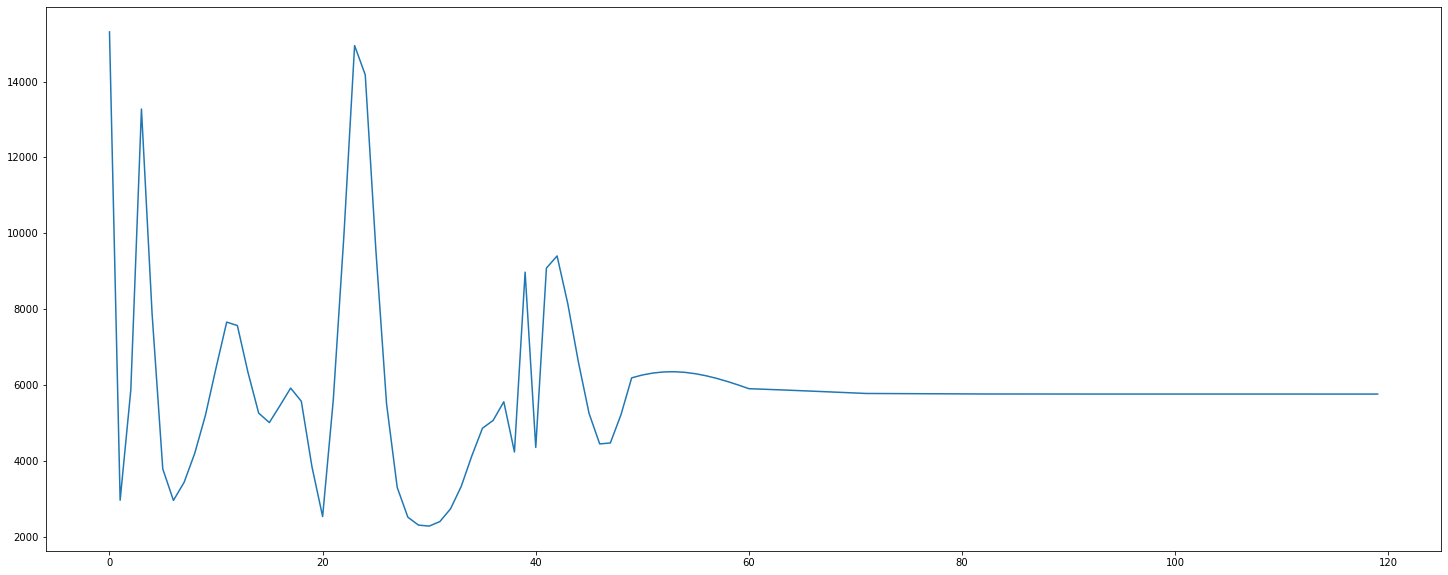

In [42]:
plt.plot(np.arange(120), accuracy['Cb'])

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data with min-max normalization
scaler = MinMaxScaler()
ebt_scaled = scaler.fit_transform(ebt[['Rs', 'Rj', 'Ra',
                                       'Sj', 'Sa', 'Sb',
                                       'Cj', 'Ca', 'Cb',
                                       'Fc']])

# Write scaled data to DataFrame
labels = ['Rs', 'Rj', 'Ra',
          'Sj', 'Sa', 'Sb',
          'Cj', 'Ca', 'Cb',
          'Fc']
ebt_scaled = pd.DataFrame(ebt_scaled, columns = labels)

# Check the scaled DataFrame
ebt_scaled.head(-10)

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,0.999640,0.017874,0.646314,4.437391e-01,0.000014,4.672258e-01,8.801519e-01,2.027305e-01,9.985097e-01,0.0
1,0.999641,0.017874,0.646314,4.437384e-01,0.000014,4.672257e-01,8.801518e-01,2.027309e-01,9.985112e-01,0.0
2,0.999642,0.017874,0.646314,4.437376e-01,0.000014,4.672255e-01,8.801517e-01,2.027313e-01,9.985126e-01,0.0
3,0.999642,0.017873,0.646313,4.437369e-01,0.000014,4.672253e-01,8.801516e-01,2.027317e-01,9.985140e-01,0.0
4,0.999643,0.017873,0.646313,4.437361e-01,0.000014,4.672251e-01,8.801515e-01,2.027321e-01,9.985154e-01,0.0
...,...,...,...,...,...,...,...,...,...,...
36486,0.000066,1.000000,1.000000,4.452738e-10,1.000000,9.053616e-10,3.735778e-10,8.290317e-11,1.568844e-07,0.0
36487,0.000066,1.000000,1.000000,4.091706e-10,1.000000,8.397362e-10,3.467977e-10,7.696076e-11,1.568010e-07,0.0
36488,0.000066,1.000000,1.000000,3.730674e-10,1.000000,7.754502e-10,3.200283e-10,7.102085e-11,1.567177e-07,0.0
36489,0.000066,1.000000,1.000000,3.489985e-10,1.000000,7.098249e-10,2.932697e-10,6.508596e-11,1.566344e-07,0.0


In [ ]:
# Visualize scaled data 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Select data to be visualized
cod = ebt_scaled[['Cj', 'Ca', 'Cb']]
sprat = ebt_scaled[['Sj', 'Sa', 'Sb']]
ebt_scaled['Time'] = np.linspace(0, 30, len(ebt_scaled))
time = demo_ebt_scaled['Time']

# Set subplot figure defaults
fig, [cod_plt, sprat_plt] = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace = 0)
fig.suptitle('Cod-sprat dynamics 20-30 years (scaled min-max)')

# Set labels for shared x-axis and individual y-axes
cod_plt.set(ylabel = 'Cod biomass')
sprat_plt.set(ylabel = 'Sprat biomass')
plt.xlabel('Time (years)')

# Visualize data
cod_plt.plot(time, cod)
sprat_plt.plot(time, sprat)

# Add legends
cod_plt.legend(['Cj', 'Ca', 'Cb'], loc = 'center left')
sprat_plt.legend(['Sj', 'Sa', 'Sb'], loc = 'center left')
